# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.special import gamma
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [44]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(d/2) * R**d / sp.gamma(1 + d/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

<IPython.core.display.Javascript object>


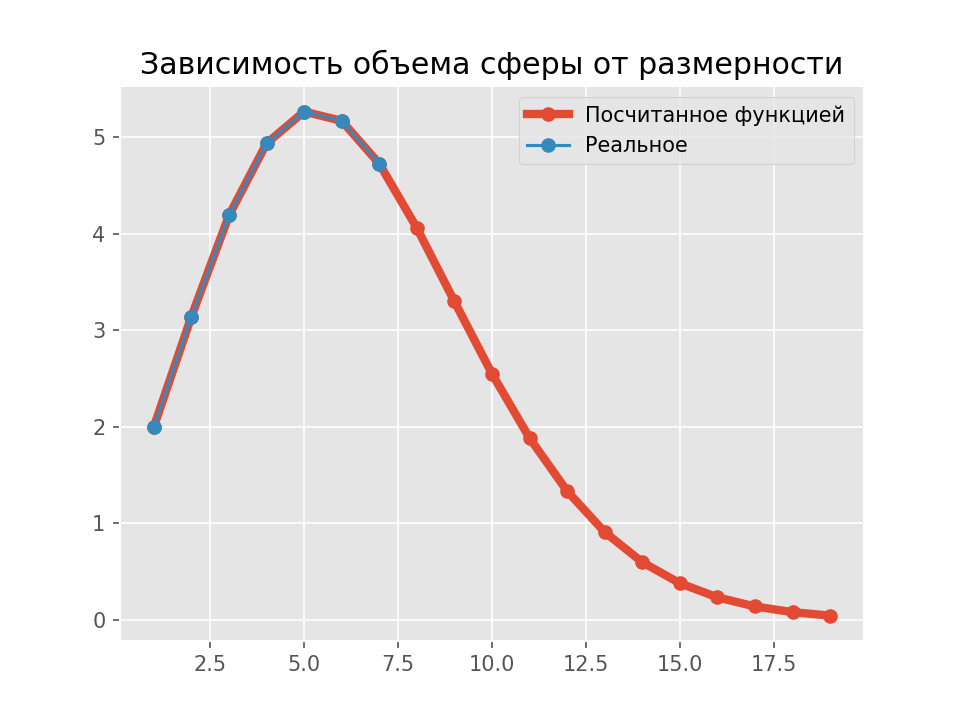

In [45]:
V_d = []
d_d = []
for d in range(1, 20):
    V_d.append(getSphereVolumeExact( d, R = 1.0))
    d_d.append(d)
V_d_real = [2, np.pi, 4 / 3 * np.pi, 0.5*np.pi**2, 8/15 * np.pi**2, np.pi**3 / 6, 16 * np.pi**3 / 105]  #данные взяты из википедии
d_d_real = [1, 2, 3, 4, 5, 6, 7]

plt.figure()
plt.plot(d_d, V_d, 'o-', lw = 4, label = 'Посчитанное функцией')
plt.plot(d_d_real, V_d_real, 'o-', label = 'Реальное')
plt.title('Зависимость объема сферы от размерности')
plt.legend()


Функция точно считает первые 7 точных объемов, значит она считает объемы правильно.

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [46]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = np.random.uniform(-1, 1, (N, D))
    k = 0
    for i in range(N):
        l = 0
        for j in range(D):
            l = l + x[i, j] ** 2
        if l <= 1:
            k = k + 1
    V = k / N * (2*R)**D   
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


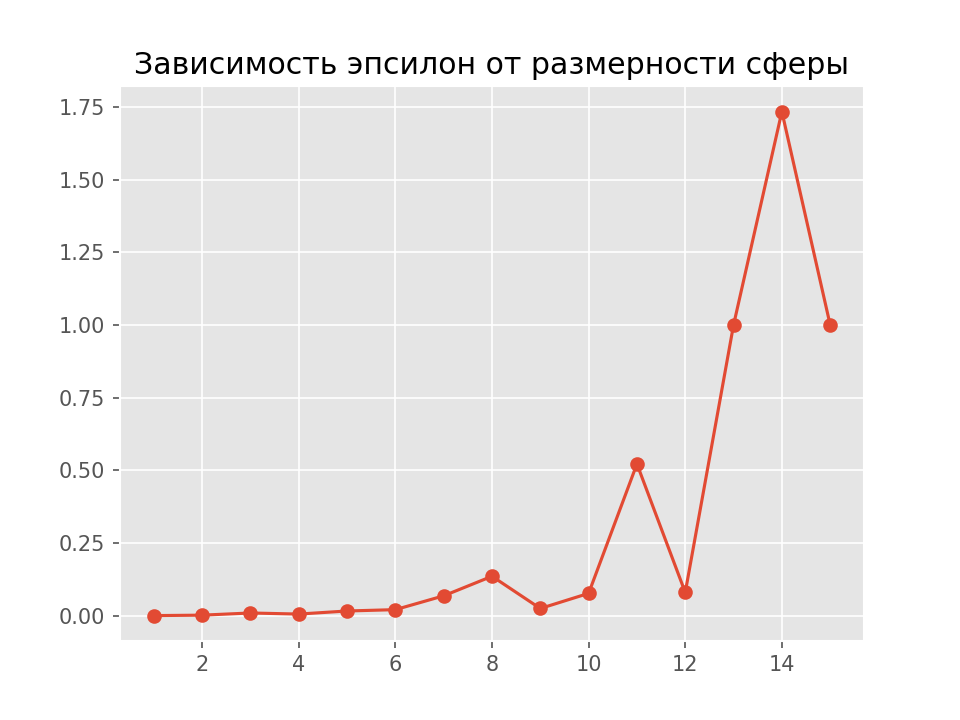

Text(0.5, 1.0, 'Зависимость эпсилон от размерности сферы')

In [47]:
N = 10000
V_random = []
d_random = []
eps = []
for d in range(1, 16):
    V_random.append(getSphereVolumePseudorandom(N, d, R = 1))
    d_random.append(d)
    eps.append(abs((V_d[d-1] - V_random[d-1]) / V_d[d - 1]))

plt.figure()
plt.plot(d_random, eps, 'o-')
plt.title('Зависимость эпсилон от размерности сферы')


### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [48]:
!pip install sobol_seq 
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [49]:
sobol_seq.i4_sobol_generate?

In [50]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = sobol_seq.i4_sobol_generate(D, N) * 2 - 1     #перевели в отрезок от -1 до 1
    k = 0
    for i in range(N):
        l = 0
        for j in range(D):
            l = l + x[i, j] ** 2
        if l <= 1:
            k = k + 1
    V = k / N * (2*R)**D   
    return V


Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


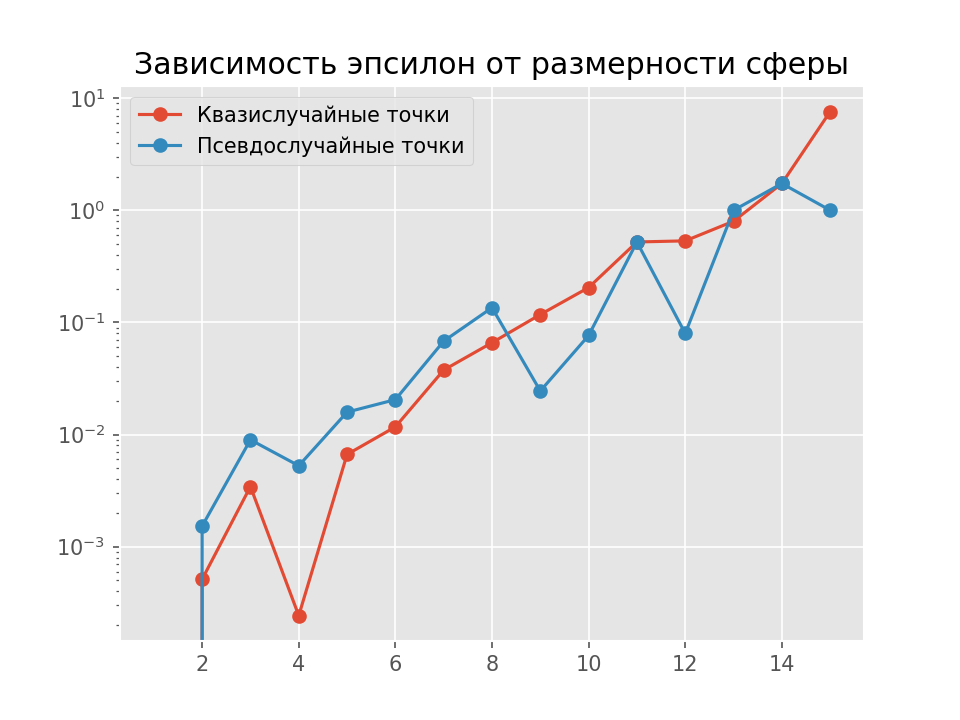

In [51]:
V_random_kvaz = []
eps_kvaz = []
for d in range(1, 16):
    V_random_kvaz.append(getSphereVolumeQuasirandom(N, d, R = 1))
    eps_kvaz.append(abs((V_d[d-1] - V_random_kvaz[d-1]) / V_d[d - 1]))

plt.figure()
plt.plot(d_random, eps_kvaz, 'o-', label = 'Квазислучайные точки')
plt.plot(d_random, eps, 'o-', label = 'Псевдослучайные точки')
plt.yscale('log')
plt.title('Зависимость эпсилон от размерности сферы')
plt.legend()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

На небольших D квазислучайно заданные точки дают более точный результат, графиу в целом выглядит плавнее.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [53]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            a = np.random.randint(1, 10)
            if a % 2 == 0:
                state[i, j] = 1
            else:
                state[i, j] = -1
            
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [60]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = state.shape[0]
    state_new = np.zeros((N+2, N+2)) 
    state_new[0, 1:N+1] = state[N-1,:]
    state_new[N+1, 1:N+1] = state[0,:]
    state_new[1:N+1, N+1] = state[:, 0]
    state_new[1:N+1, 0] = state[:, N-1]
    state_new[1:N+1, 1:N+1] = state
    dE = 2 * state[i, j] * sum([state_new[i+1,j], state_new[i+1,j+2], state_new[i,j+1], state_new[i+2,j+1]])
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [83]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не меняет сосотояния state)
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    for a in range(N**2):
        i = np.random.randint(0, N-1)
        j = np.random.randint(0, N-1)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i, j] = state[i,j] * (-1)
        else:
            if np.random.uniform() < np.exp(-dE / T):
                state[i, j] = state[i,j] * (-1)
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [84]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    N = state.shape[0]
    state_new = np.zeros((N+2, N+2)) 
    state_new[0, 1:N+1] = state[N-1,:]
    state_new[N+1, 1:N+1] = state[0,:]
    state_new[1:N+1, N+1] = state[:, 0]
    state_new[1:N+1, 0] = state[:, N-1]
    state_new[1:N+1, 1:N+1] = state
    E = 0
    for i in range(N):
        for j in range(N):
            dE = - state[i, j] * sum([state_new[i+1,j], state_new[i+1,j+2], state_new[i,j+1], state_new[i+2,j+1]])
            E = E + dE
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [85]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [89]:
N       = 10         # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


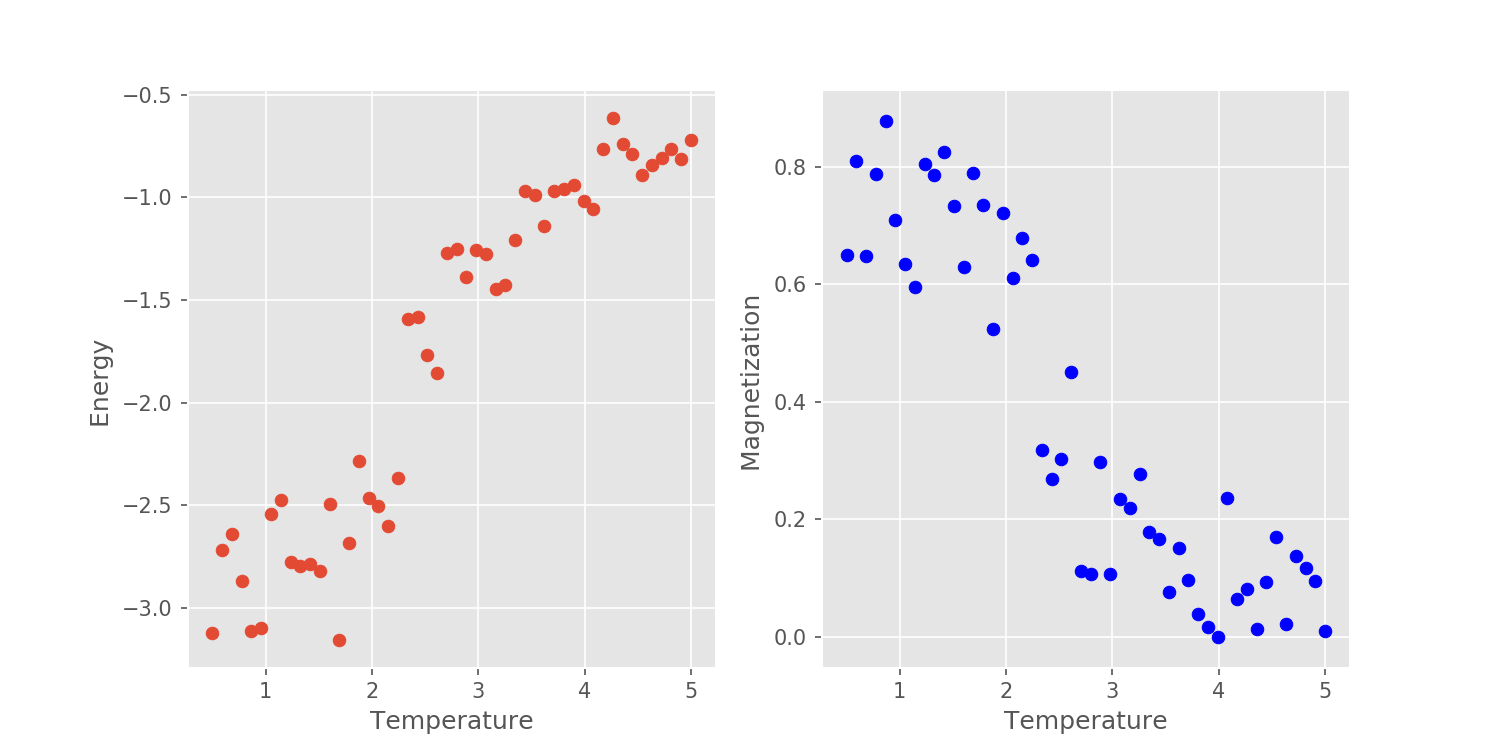

In [90]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Энергия растет в зависимости от температуры. При нагревании магнита связи, держащие диполи ориентированными в одном направлении, ослабевают (нарушается упорядоченность диполей молекул), поэтому  магнитное поле магнита ослабевает.

"Превращение ферромагнетик - парамагнетик принято рассматривать как фазовый
переход 2-го рода. Рентгеноструктурными исследованиями установлено, что это
превращение не сопровождается изменением структуры кристалла и, следовательно,
выделением или поглощением скрытой теплоты. При приближении к температуре
перехода Тс испытывают аномальное поведение (скачки): теплоемкость, коэффициенты
расширения и сжимаемости, что характерно для фазовых переходов 2-го рода."

Ссылка на статью и пояснения ниже.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [92]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


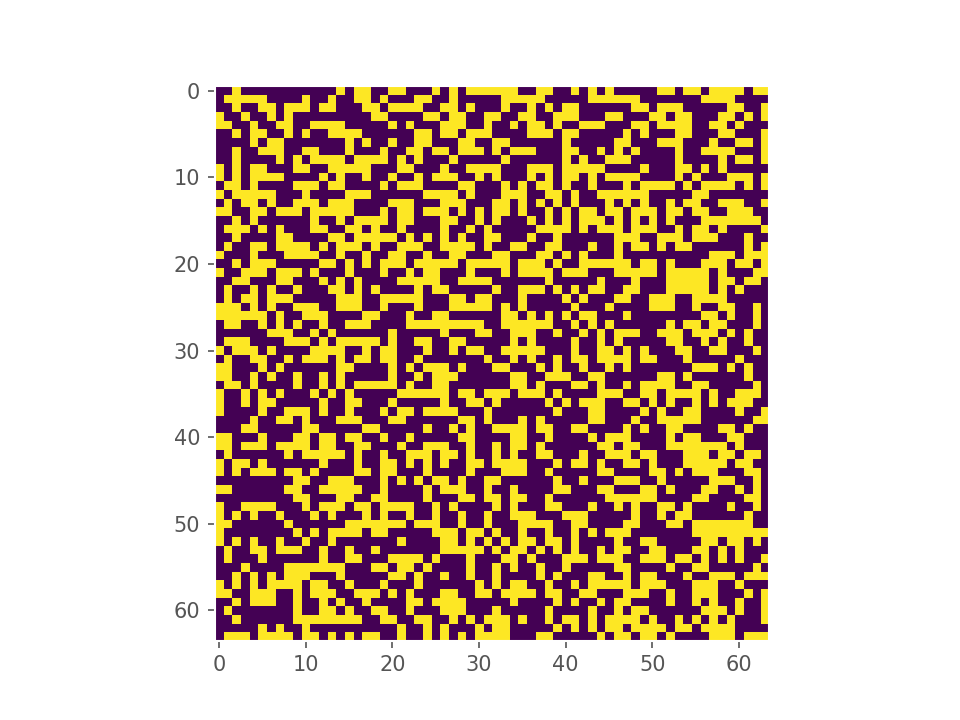

In [93]:
plt.figure()
plt.imshow(state)
plt.grid()
makeFlip(0.5, state);

<IPython.core.display.Javascript object>


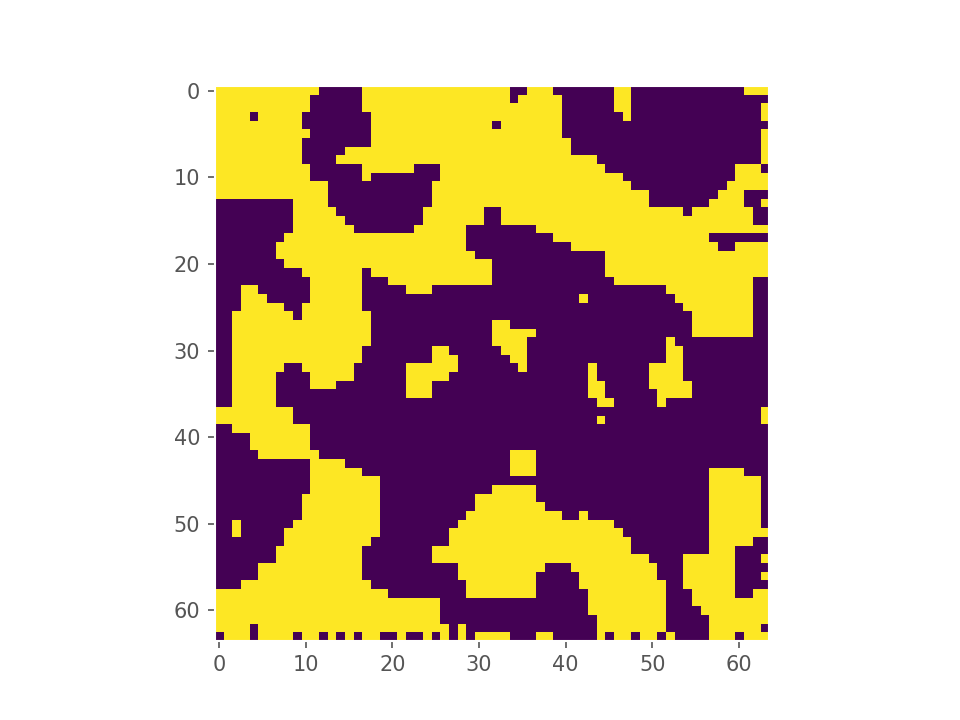

In [94]:
state_nowoe = state
for i in range(1, 10):
    state_nowoe = makeFlip(0.5, state_nowoe)
    
plt.figure()
plt.imshow(state_nowoe)
plt.grid()

<IPython.core.display.Javascript object>


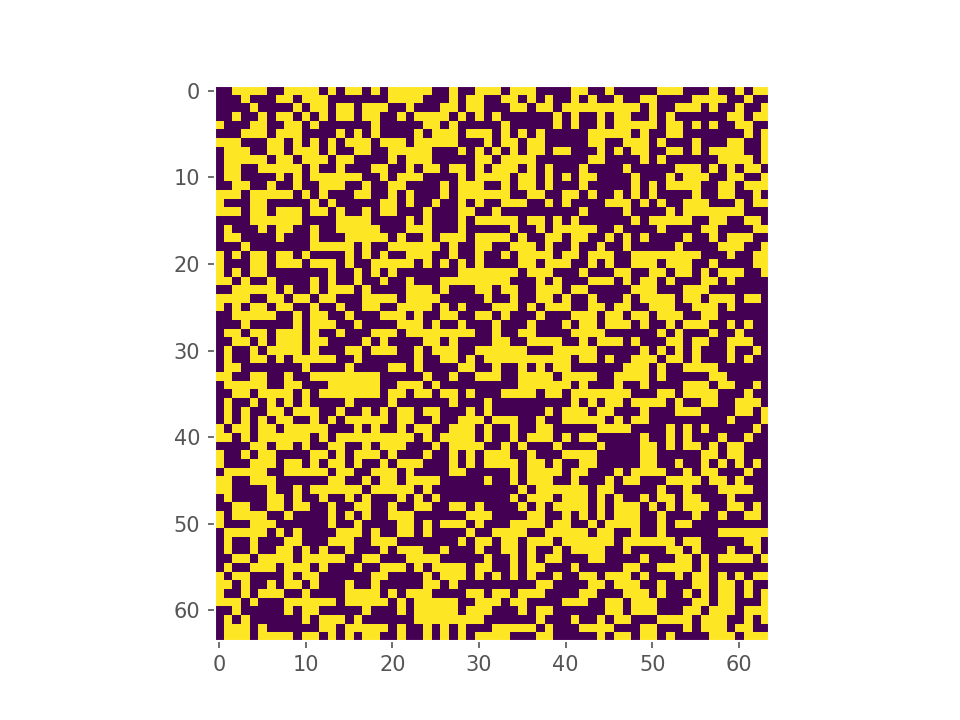

In [96]:
state_nowoe2 = state
for i in range(1, 10):
    state_nowoe2 = makeFlip(50, state_nowoe2)
    
plt.figure()
plt.imshow(state_nowoe2)
plt.grid()

"Исчезновение ферромагнитных свойств при нагревании происходит постепенно. (...)
Намагниченность насыщения уменьшается при приближении к температуре Кюри.
Принято определять последнюю точкой пересечения продолжения наиболее крутого
участка спада кривой намагничивания с осью абсцисс. Реально же на кривой получается
весьма небольшой некоторый "хвост", который объясняется неоднородностью материала.
Общее качественное описание ферромагнитного превращения состоит в следующем. При
низких температурах, когда ферромагнетик находится почти полностью в упорядоченном
состоянии, разрушение параллельного расположения спинов при возрастании
температуры происходит очень медленно. Однако по мере дальнейшего увеличения
температуры разрушение упорядоченного состояния облегчается и все меньше требуется
энергии для дальнейшего нарушения упорядочения. Возникает лавинообразное
нарастание неупорядоченного состояния. Все более увеличивается число
антипараллельных спинов, и все слабее становится корреляция в расположении удаленных
спинов. Наконец, наступает такой момент, когда все связи выходят из строя и дальний
магнитный порядок исчезает. Температура ТС, при которой это происходит, и есть точка
Кюри. Вещество становится парамагнитным." Лабораторный практикум по общей физике, МГУ, Физический факультет

http://genphys.phys.msu.ru/rus/lab/elmag/Lab306_17.pdf

Я не думаю, что перескажу лучше своими словами, так что оставлю вот этот кусочек из статьи.